@author: Octavio Gutiérrez de Código Máquina

URL del canal: https://www.youtube.com/CodigoMaquina

URL del video: https://youtu.be/z5rmY-LV7ME

# Árboles de Decisión
### Padecimientos cardíacos
    - Tenemos un dataset con las columnas de 'edad', 'colesterol' y 'problemas cardiacos'

# Gráfica dispersión: Edad y Colesterol

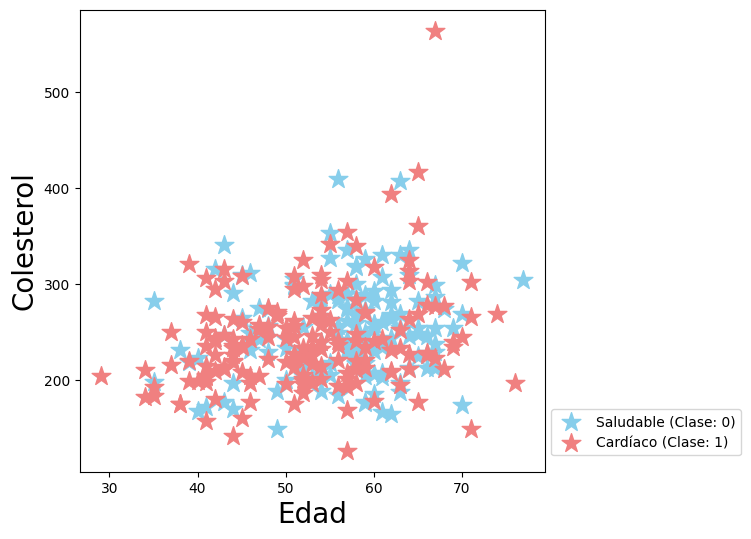

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pacientes = pd.read_csv("../datasets/pacientes.csv")

saludables = pacientes[pacientes["problema_cardiaco"]==0]
cardiacos = pacientes[pacientes["problema_cardiaco"]==1]

plt.figure(figsize=(6, 6))
plt.xlabel('Edad', fontsize = 20.0)
plt.ylabel('Colesterol', fontsize = 20.0)
plt.scatter(saludables["edad"], saludables["colesterol"], 
            label="Saludable (Clase: 0)", marker="*", c="skyblue", s=200)
plt.scatter(cardiacos["edad"], cardiacos["colesterol"],
            label="Cardíaco (Clase: 1)", marker="*", c="lightcoral", s=200)
plt.legend(bbox_to_anchor=(1, 0.15))
plt.show()


In [11]:
# Mostramos el dataset
pacientes.head()

,edad,colesterol,problema_cardiaco
0,63,233,1
1,37,250,1
2,41,204,1
3,56,236,1
4,57,354,1


# Entropía:
#### Promedio de información almacenada en una variable aleatoria
- Ejemplo simple de como usar el calculo de la entropía.

In [12]:
from scipy.stats import entropy
from math import log

edades = pd.Series([40, 30, 20, 50])
colesterol = pd.Series([100, 110, 100, 110])

print(edades.value_counts()/edades.size)
print(colesterol.value_counts()/colesterol.size)
print(entropy(edades.value_counts()/edades.size, base=2))
print(entropy(colesterol.value_counts()/colesterol.size, base=2))


40    0.25
30    0.25
20    0.25
50    0.25
Name: count, dtype: float64
100    0.5
110    0.5
Name: count, dtype: float64
2.0
1.0


# Datos de Entrenamiento y Prueba

In [13]:
from sklearn.model_selection import train_test_split

datos_entrena, datos_prueba, clase_entrena, clase_prueba = train_test_split(
    pacientes[["edad", "colesterol"]],
    pacientes["problema_cardiaco"], 
    test_size=0.30)


# Creación del Árbol de Decisión
- scikit-learn utiliza una versión optimizada del algoritmo CART; Sin embargo, el La implementación de scikit-learn no admite variables categóricas por ahora.

0.6222222222222222
|--- Edad <= 54.50
|   |--- Colesterol <= 278.50
|   |   |--- class: 1
|   |--- Colesterol >  278.50
|   |   |--- class: 0
|--- Edad >  54.50
|   |--- Edad <= 70.50
|   |   |--- class: 0
|   |--- Edad >  70.50
|   |   |--- class: 1



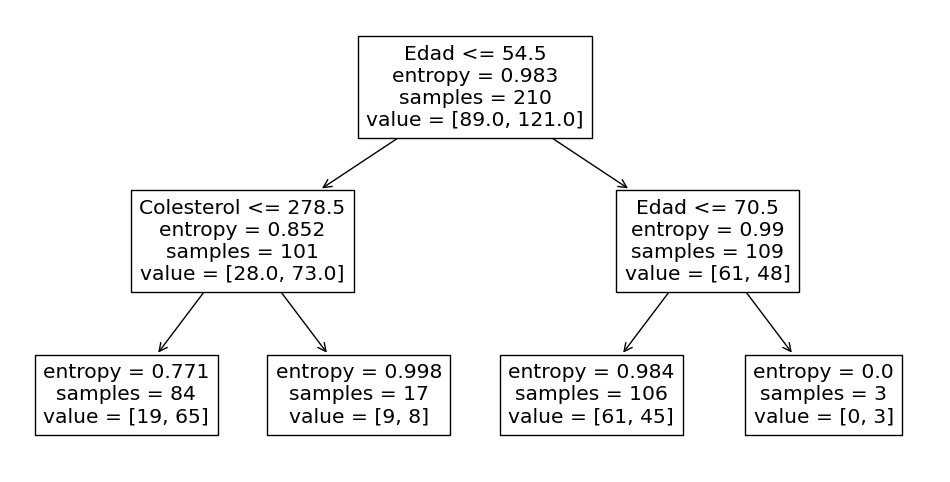

In [14]:
from sklearn import tree

arbol_decision = tree.DecisionTreeClassifier(criterion="entropy", max_depth=2)

arbol = arbol_decision.fit(datos_entrena, clase_entrena)

accuracy = arbol_decision.score(datos_prueba, clase_prueba)

print(accuracy)

print(tree.export_text(arbol,
                      feature_names=["Edad", "Colesterol"]))
plt.figure(figsize=(12, 6))
tree.plot_tree(arbol, 
              feature_names=["Edad", "Colesterol"])
plt.show()


In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
datos_entrena = sc.fit_transform(datos_entrena)
datos_prueba = sc.transform(datos_prueba)

# Clasifica a nuevos pacientes

In [17]:
print("Nuevo paciente", arbol_decision.predict([[70, 150]]))

Nuevo paciente [0]


c:\Users\lufer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [18]:
import pandas as pd

# Crear el DataFrame
data = {'edad': [63, 37, 41, 56, 57, 57, 56, 44, 52, 57, 54, 48, 49, 64, 58, 50, 58, 66, 43, 69],
        'colesterol': [233, 250, 204, 236, 354, 192, 294, 263, 199, 168, 239, 275, 266, 211, 283, 219, 340, 226, 247, 239],
        'problema_cardiaco': [1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1]}
df = pd.DataFrame(data)

df


,edad,colesterol,problema_cardiaco
0,63,233,1
1,37,250,0
2,41,204,1
3,56,236,0
4,57,354,1
5,57,192,1
6,56,294,0
7,44,263,1
8,52,199,1
9,57,168,0


In [19]:
df["problema_cardiaco"].value_counts()

problema_cardiaco
1    11
0     9
Name: count, dtype: int64

In [20]:
df.sort_values(by="edad")

,edad,colesterol,problema_cardiaco
1,37,250,0
2,41,204,1
18,43,247,0
7,44,263,1
11,48,275,0
12,49,266,1
15,50,219,0
8,52,199,1
10,54,239,0
3,56,236,0


|--- Edad <= 60.50
|   |--- Colesterol <= 317.00
|   |   |--- class: 0
|   |--- Colesterol >  317.00
|   |   |--- class: 1
|--- Edad >  60.50
|   |--- class: 1



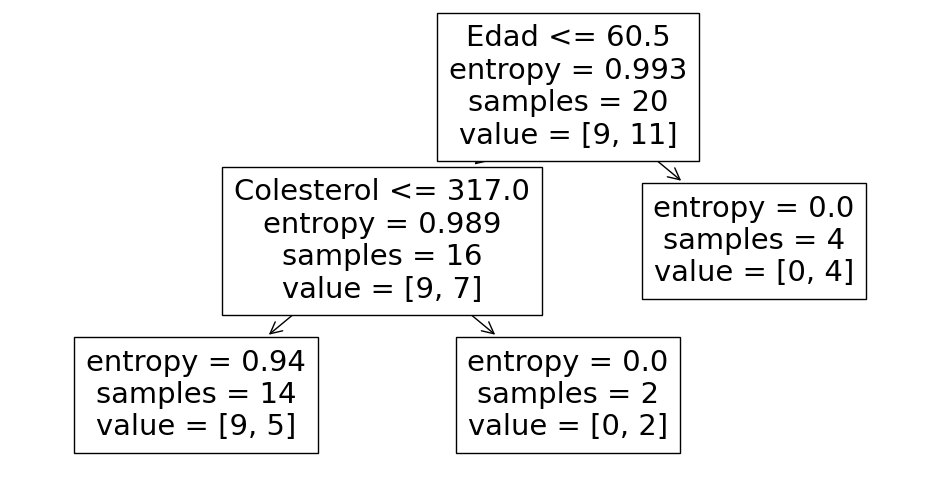

In [21]:
arbol_decision = tree.DecisionTreeClassifier(criterion="entropy", max_depth=2)

arbol = arbol_decision.fit(df[["edad", "colesterol"]], df["problema_cardiaco"])

print(tree.export_text(arbol,
                      feature_names=["Edad", "Colesterol"]))
plt.figure(figsize=(12, 6))
tree.plot_tree(arbol, 
              feature_names=["Edad", "Colesterol"])
plt.show()

<BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR>